# Move Fast - Computer Vision

Use the  fastai V1 library on top of Pytorch 1.0 to train a custom image classifier with limited examples using a pretrained CNN.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Current Hardware

Salamander - Accelerated Computing VM
* K80 GPU
* 4x vCPU
* 61GB RAM

Import required libraries.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 8 # low batch size as we will have limited data

Load the data

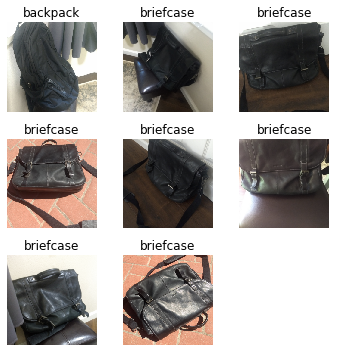

In [3]:
path = Path("./cnnphotos/")
path.ls()
data = ImageDataBunch.from_folder(path, valid_pct=.2, ds_tfms=get_transforms(), size=299, bs=bs)
data.show_batch(rows=3, figsize=(5,5))

We will use resnet50 (resnet50 has 50 layers) as our starting point. See [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

In [4]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Fit using a 1cycle policy.  See [The 1cycle policy](https://sgugger.github.io/the-1cycle-policy.html).

In [5]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.637505,0.127023,0.000000,00:20
1,0.374846,0.031247,0.000000,00:11


We will save the current model here in case we need to go back.

In [6]:
learn.save('first-model-res-50');

### Results

0 Error rate on our 20% validation hold out!!!